In [379]:
# importing required libraries
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

# PART 1

In [380]:
# Reading multiple csv files using glob
filenames = glob.glob("states*.csv")
dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

In [381]:
# Concatenate all data into one DataFrame
us_census = pd.concat(dfs, ignore_index=True)

In [382]:
#sorting values of state in ascending order
us_census = us_census.sort_values(['State'])

In [383]:
# Deleting duplicate rows based on State name
us_census = us_census.drop_duplicates(['State'])

In [384]:
# reseting index after droping duplicate rows 
us_census = us_census.reset_index(drop=True)

In [385]:
# converting income column values to float from string with dollar sign with regex 
us_census['Income'] = us_census.Income.replace('[^.0-9]', '', regex=True).astype(float).round(2)

In [386]:
# spliting the genderpop values into two part
us_census[['Men','Women']] = us_census.GenderPop.str.split('_',expand=True)

In [387]:
# now that we have created two separate columns from GenderPop we futher no need it, so we delete it
del us_census['GenderPop']

In [388]:
# coverting each value of Men and Women columns from string to int
us_census['Men'] = us_census.Men.replace('[^0-9]','',regex=True).astype(int)

In [389]:
# Looks like some values were missing for the Women column and are only left with string letter F
# therefore first we will replace these with valid values for furhter manipulation
us_census['Women'] = us_census.Women.replace('F','0F')
# Now converting this women column values into int and the missing values with 0
us_census['Women'] = us_census.Women.replace('[^0-9]','',regex=True).astype(int)

In [390]:
# we find those missing values for Women Column by using Total Population and Men Population columns
# Women = TotalPop - Men
us_census['Women'] = us_census['TotalPop'] - us_census['Men']

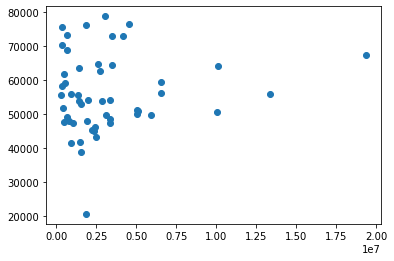

In [391]:
# as our dataframe is ready now i.e now we will use matplotlib to scatterplot between women and income
plt.scatter(us_census['Women'],us_census['Income'])
plt.show()

In [392]:
# Converting the Races column into numerical format
us_census['Hispanic'] = us_census.Hispanic.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['White'] = us_census.White.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['White'] = us_census.White.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['Black'] = us_census.Black.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['Native'] = us_census.Native.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['Asian'] = us_census.Asian.replace('[^.0-9]','',regex=True).astype(float).round(2)
us_census['Pacific'] = us_census.Pacific.replace('[^.0-9]','',regex=True).astype(float).round(2)

In [393]:
# Finding the mean values for each race column and adding them up gives 97.35 which can be used to find 
# the approximate missing values in the Pacific column
total_mean = (us_census['Hispanic'].mean()+us_census['White'].mean()+us_census['Black'].mean()
              +us_census['Native'].mean()+us_census['Asian'].mean()+us_census['Pacific'].mean())
print(total_mean)

97.3542761785565


In [394]:
# since there are missing values in Pacific column so in order to find these missing values
# we can add all rest of races column and subtract it from 97.35 to give the value of Pacific column
us_census['Pacific'] = 97.35 - (us_census['Hispanic']+us_census['White']+us_census['Black']
                       +us_census['Native']+us_census['Asian'])

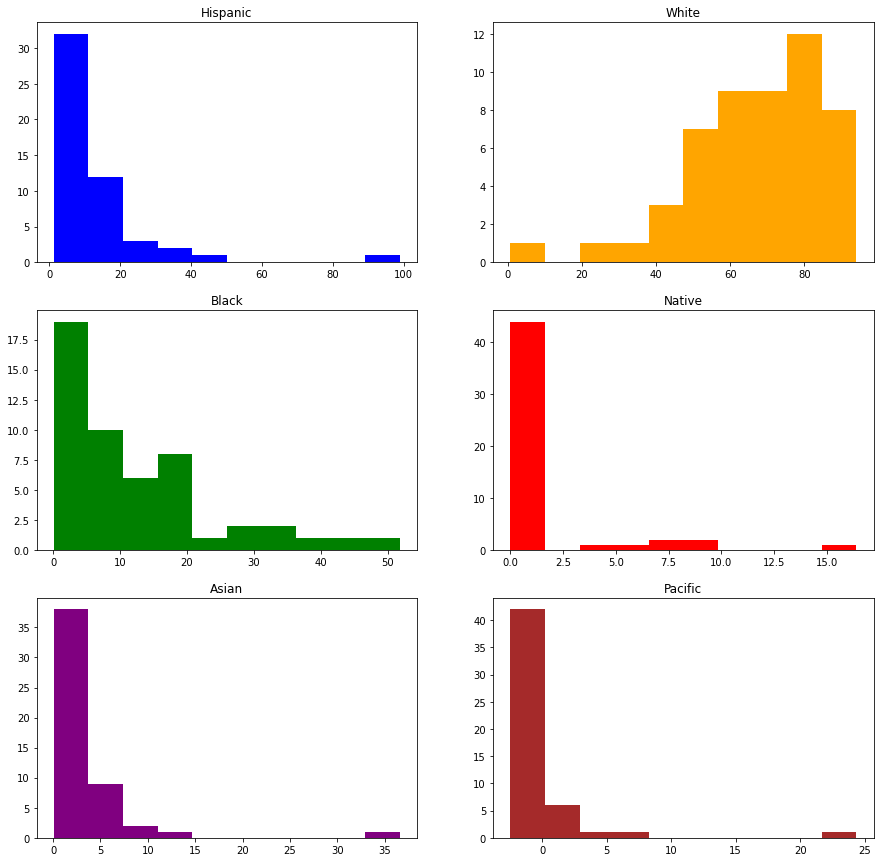

In [395]:
# designing the plot figure
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 2, 1)
ax2 = fig.add_subplot(3, 2, 2)
ax3 = fig.add_subplot(3, 2, 3)
ax4 = fig.add_subplot(3, 2, 4)
ax5 = fig.add_subplot(3, 2, 5)
ax6 = fig.add_subplot(3, 2, 6)
# ploting each race on a histogram figure
ax1.hist(us_census['Hispanic'], color='blue')
ax1.title.set_text('Hispanic')
ax2.hist(us_census['White'], color='orange')
ax2.title.set_text('White')
ax3.hist(us_census['Black'], color='green')
ax3.title.set_text('Black')
ax4.hist(us_census['Native'], color='red')
ax4.title.set_text('Native')
ax5.hist(us_census['Asian'], color='purple')
ax5.title.set_text('Asian')
ax6.hist(us_census['Pacific'], color='brown')
ax6.title.set_text('Pacific')

Text(0.5, 1.0, 'All Races in One Plot')

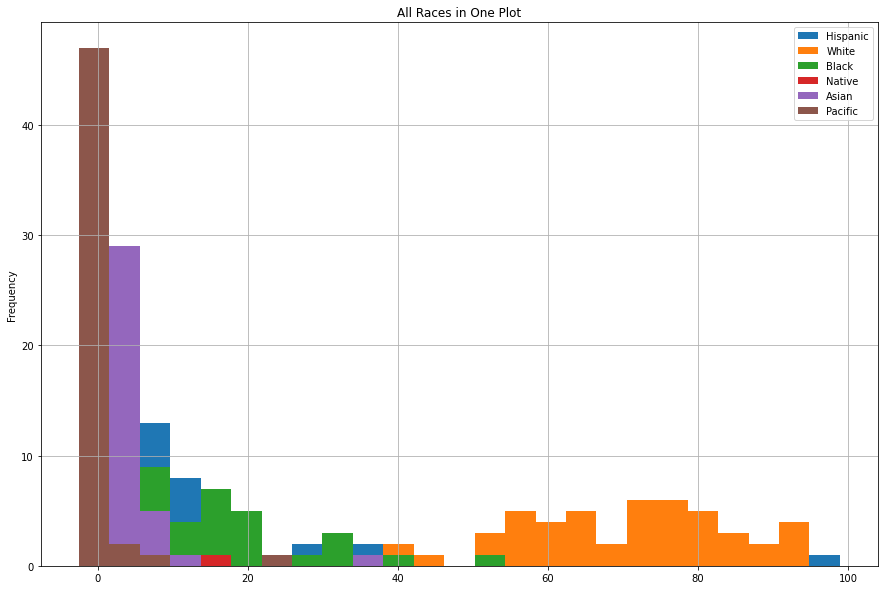

In [396]:
# ploting all races column on one plot
us_census[['Hispanic','White','Black','Native','Asian','Pacific']].plot.hist(grid=True,bins=25
                                        ,figsize=(15,10)).set_title("All Races in One Plot")

# PART 2

In [397]:
# Reading the inventory csv file and loading it into a dataframe called inventory
inventory = pd.read_csv('inventory.csv')
inventory

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [398]:
# saving the first 10 rows into staten_island dataframe
staten_island = inventory.iloc[:10]
staten_island

,location,product_type,product_description,quantity,price
0,Staten Island,seeds,daisy,4,6.99
1,Staten Island,seeds,calla lily,46,19.99
2,Staten Island,seeds,tomato,85,13.99
3,Staten Island,garden tools,rake,4,13.99
4,Staten Island,garden tools,wheelbarrow,0,89.99
5,Staten Island,garden tools,spade,93,19.99
6,Staten Island,pest_control,insect killer,74,12.99
7,Staten Island,pest_control,weed killer,8,23.99
8,Staten Island,planter,20 inch terracotta planter,0,17.99
9,Staten Island,planter,8 inch plastic planter,53,3.99


In [399]:
# saving product_description column of staten_island dataframe into product_request
product_request = staten_island['product_description']
product_request

0                         daisy
1                    calla lily
2                        tomato
3                          rake
4                   wheelbarrow
5                         spade
6                 insect killer
7                   weed killer
8    20 inch terracotta planter
9        8 inch plastic planter
Name: product_description, dtype: object

In [400]:
# rows where location is brooklyn and product is seed
seed_request = inventory[(inventory['location']=='Brooklyn')&(inventory['product_type']=='seeds')]
seed_request

,location,product_type,product_description,quantity,price
10,Brooklyn,seeds,daisy,50,6.99
11,Brooklyn,seeds,calla lily,0,19.99
12,Brooklyn,seeds,tomato,0,13.99


In [401]:
# Add a column to inventory called in_stock which is True if quantity is 
# greater than 0 and False if quantity equals 0.
inventory['in_stock'] = (inventory.quantity > 0)
inventory

,location,product_type,product_description,quantity,price,in_stock
0,Staten Island,seeds,daisy,4,6.99,True
1,Staten Island,seeds,calla lily,46,19.99,True
2,Staten Island,seeds,tomato,85,13.99,True
3,Staten Island,garden tools,rake,4,13.99,True
4,Staten Island,garden tools,wheelbarrow,0,89.99,False
5,Staten Island,garden tools,spade,93,19.99,True
6,Staten Island,pest_control,insect killer,74,12.99,True
7,Staten Island,pest_control,weed killer,8,23.99,True
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False
9,Staten Island,planter,8 inch plastic planter,53,3.99,True


In [402]:
# Create a column called total_value that is equal to price multiplied by quantity
inventory['total_value'] = inventory['price']*inventory['quantity']
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value
0,Staten Island,seeds,daisy,4,6.99,True,27.96
1,Staten Island,seeds,calla lily,46,19.99,True,919.54
2,Staten Island,seeds,tomato,85,13.99,True,1189.15
3,Staten Island,garden tools,rake,4,13.99,True,55.96
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00
5,Staten Island,garden tools,spade,93,19.99,True,1859.07
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47


In [403]:
# lambda function combines product_type and product_description into a single string
combine_lambda = lambda row: \
    '{} - {}'.format(row.product_type,
                     row.product_description)
# Using combine_lambda, create a new column in inventory called full_description that
# has the complete description of each product
inventory['full_description'] = inventory.apply(combine_lambda, axis='columns')
inventory

,location,product_type,product_description,quantity,price,in_stock,total_value,full_description
0,Staten Island,seeds,daisy,4,6.99,True,27.96,seeds - daisy
1,Staten Island,seeds,calla lily,46,19.99,True,919.54,seeds - calla lily
2,Staten Island,seeds,tomato,85,13.99,True,1189.15,seeds - tomato
3,Staten Island,garden tools,rake,4,13.99,True,55.96,garden tools - rake
4,Staten Island,garden tools,wheelbarrow,0,89.99,False,0.00,garden tools - wheelbarrow
5,Staten Island,garden tools,spade,93,19.99,True,1859.07,garden tools - spade
6,Staten Island,pest_control,insect killer,74,12.99,True,961.26,pest_control - insect killer
7,Staten Island,pest_control,weed killer,8,23.99,True,191.92,pest_control - weed killer
8,Staten Island,planter,20 inch terracotta planter,0,17.99,False,0.00,planter - 20 inch terracotta planter
9,Staten Island,planter,8 inch plastic planter,53,3.99,True,211.47,planter - 8 inch plastic planter
